In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("/Users/maggie/Documents/Bioinfo/Bioinfo-Simulation/latimes-county-totals.csv")

In [3]:
df.head()

,date,county,fips,confirmed_cases,deaths,new_confirmed_cases,new_deaths
0,2020-01-26,Alameda,1,0,0,NaN,NaN
1,2020-01-31,Alameda,1,0,0,0.0,0.0
2,2020-02-02,Alameda,1,0,0,0.0,0.0
3,2020-02-20,Alameda,1,0,0,0.0,0.0
4,2020-02-21,Alameda,1,0,0,0.0,0.0


In [4]:
df_la = df[df['county'] == 'Los Angeles']

In [5]:
df.columns

Index(['date', 'county', 'fips', 'confirmed_cases', 'deaths',
       'new_confirmed_cases', 'new_deaths'],
      dtype='object')

In [6]:
df_la_death = la_death = df_la.drop(['fips','new_confirmed_cases','new_deaths','confirmed_cases'], axis=1)

In [7]:
la_death

,date,county,deaths
867,2020-01-26,Los Angeles,0
868,2020-01-27,Los Angeles,0
869,2020-01-28,Los Angeles,0
870,2020-01-29,Los Angeles,0
871,2020-01-30,Los Angeles,0
...,...,...,...
962,2020-04-30,Los Angeles,1119
963,2020-05-01,Los Angeles,1174
964,2020-05-02,Los Angeles,1212
965,2020-05-03,Los Angeles,1231


In [8]:
la_confirmed = df_la.drop(['fips','new_confirmed_cases','new_deaths','deaths','county'], axis=1)

In [9]:
la_confirmed

,date,confirmed_cases
867,2020-01-26,1
868,2020-01-27,1
869,2020-01-28,1
870,2020-01-29,1
871,2020-01-30,1
...,...,...
962,2020-04-30,23233
963,2020-05-01,24262
964,2020-05-02,24936
965,2020-05-03,25699


In [10]:
days = list(range(1,len(la_confirmed)+1))
len(days)

100

In [11]:
la_confirmed['date'] = days

In [12]:
la_confirmed

,date,confirmed_cases
867,1,1
868,2,1
869,3,1
870,4,1
871,5,1
...,...,...
962,96,23233
963,97,24262
964,98,24936
965,99,25699


In [13]:
X = la_confirmed['date'].values.reshape(-1,1)
y = la_confirmed['confirmed_cases'].values.reshape(-1,1)

In [14]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=0)

In [15]:
min_max_scaler = MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(train_X)
X_test_minmax = min_max_scaler.transform(test_X)
X_test_minmax 

NameError: name 'X_train' is not defined

## RBF


In [16]:
svr_rbf = SVR(kernel='rbf', C= 100, gamma = 200)

In [17]:
svr_rbf.fit(train_X,train_y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=200,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [18]:
y_predict = svr_rbf.predict(test_X)
y_predict

array([104.48333333, 104.48333333, 104.48333333, 104.48333333,
       104.48333333, 104.48333333, 104.48333333, 104.48333333,
       104.48333333, 104.48333333, 104.48333333, 104.48333333,
       104.48333333, 104.48333333, 104.48333333, 104.48333333,
       104.48333333, 104.48333333, 104.48333333, 104.48333333,
       104.48333333, 104.48333333, 104.48333333, 104.48333333,
       104.48333333, 104.48333333, 104.48333333, 104.48333333,
       104.48333333, 104.48333333])

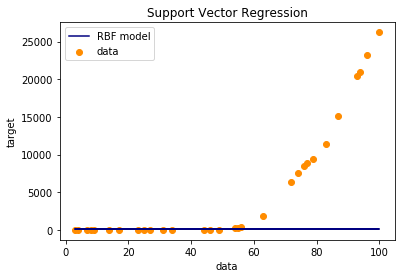

In [19]:
# lw = 2
plt.scatter(test_X, test_y, color='darkorange', label='data')
plt.plot(test_X, y_predict, color='navy', label='RBF model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [133]:
#evaluate model using mse
mse = mean_squared_error(test_y,y_predict)
#root mean square
rmse= np.sqrt(mse)
rmse

9587.685108237662

# Linear

In [18]:
svr_linear = SVR(kernel='linear', C= 100, gamma = 'auto')

In [22]:
# train_y

In [19]:
svr_linear.fit(train_X,train_y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [20]:
y_predict = svr_linear.predict(test_X)
y_predict

array([  148.62340426,  8716.58085106, -3396.73829787,  4432.60212766,
        6353.00638298,  8273.4106383 , -1328.6106383 ,  7830.24042553,
        4284.8787234 ,  6057.55957447,  4137.15531915,  9307.47446809,
        6796.17659574, -1771.78085106, -2658.1212766 ,   739.51702128,
        -442.27021277,  -146.82340426,  1182.68723404, -2510.39787234,
        2659.9212766 ,  5466.66595745, -3249.01489362,  9012.02765957,
        2955.36808511,  3398.53829787, -2805.84468085, 10341.53829787,
        8125.68723404])

In [ ]:
#evaluate model using mse
mse = mean_squared_error(test_y,y_predict)
#root mean square
rmse= np.sqrt(mse)
rmse

# Polynomial


In [ ]:
svr_poly = SVR(kernel='poly', C= 100, gamma = 'auto',degree = 2)

In [ ]:
svr_poly.fit(train_X,train_y)
print('work')

In [ ]:
y_predict = svr_poly.predict(test_X)
y_predict


In [ ]:
#evaluate model using mse
mse = mean_squared_error(test_y,y_predict)
#root mean square
rmse= np.sqrt(mse)
rmse